### 파이썬 딥러닝 텐서플로 : 텐서플로와 딥러닝, 최적의 입문서
### part 04 합성곱 신경망 CNN 03 복잡한 모델 생성
### 교재 내 코드 정리

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
y_train_odd = []
for y in y_train :
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)
        
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [3]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [4]:
y_valid_odd = []
for y in y_valid :
    if y % 2 == 0 :
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape
        

(10000,)

In [5]:
print(y_valid[:10])
print(y_valid_odd[:10])

[7 2 1 0 4 1 4 9 5 9]
[1 0 1 0 0 1 0 1 1 1]


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#normalization
x_train = x_train/255.0
x_valid = x_valid/255.0

#adding channel
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


2022-02-17 08:28:32.195541: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-17 08:28:32.195917: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
inputs=tf.keras.layers.Input(shape=(28,28,1))

conv=tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 5408)         0           max_pooling2d[0][0]              
______________________________________________________________________________________________

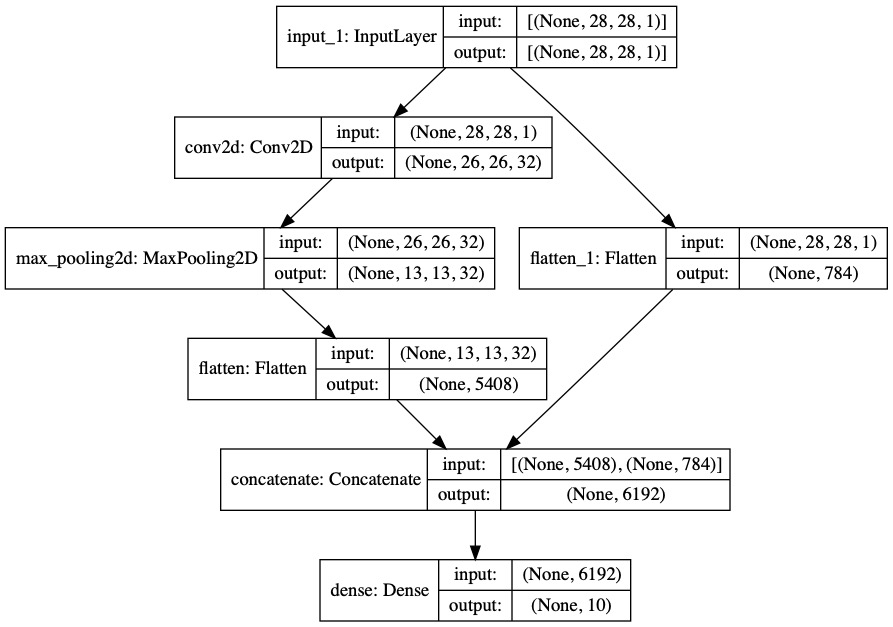

In [9]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.jpg')

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

2022-02-17 08:03:19.248957: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3681 - accuracy: 0.8941 - val_loss: 0.0891 - val_accuracy: 0.9723
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0793 - accuracy: 0.9776 - val_loss: 0.0616 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0594 - accuracy: 0.9828 - val_loss: 0.0647 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0575 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0529 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0540 - val_ac

In [10]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')
conv = tf.keras.layers.Conv2D(32,(3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_layer (Conv2D)           (None, 26, 26, 32)   320         inputs[0][0]                     
__________________________________________________________________________________________________
maxpool_layer (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d_layer[0][0]               
__________________________________________________________________________________________________
flatten_layer (Flatten)         (None, 5408)         0           maxpool_layer[0][0]              
____________________________________________________________________________________________

In [12]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


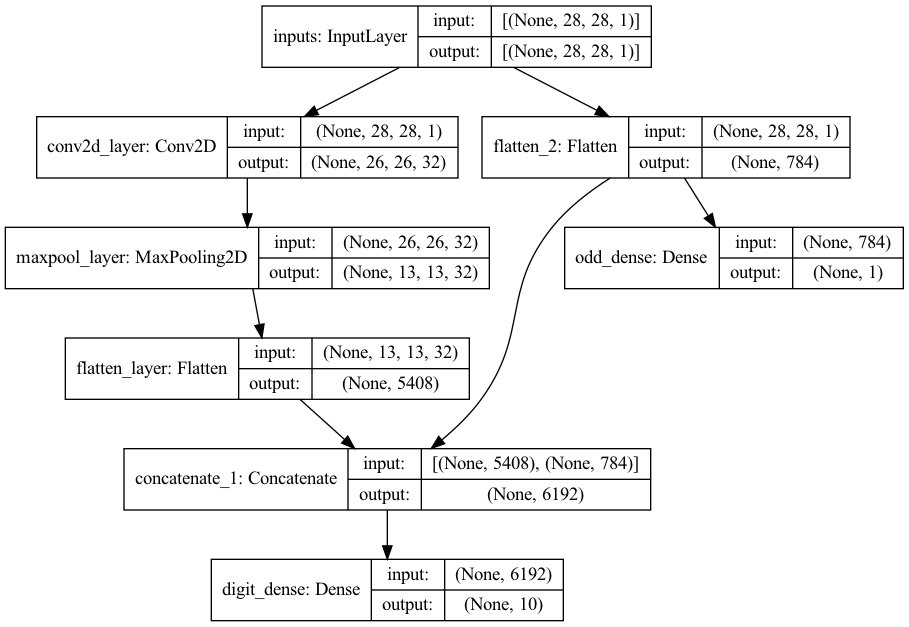

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [15]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

#모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data=({'inputs': x_valid_in}, {'digit_dense': y_valid,'odd_dense': y_valid_odd}),
                    epochs=10)

2022-02-18 04:37:33.684651: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5650 - digit_dense_loss: 0.3725 - odd_dense_loss: 0.3849 - digit_dense_accuracy: 0.8917 - odd_dense_accuracy: 0.8350 - val_loss: 0.2166 - val_digit_dense_loss: 0.0785 - val_odd_dense_loss: 0.2762 - val_digit_dense_accuracy: 0.9780 - val_odd_dense_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2166 - digit_dense_loss: 0.0790 - odd_dense_loss: 0.2752 - digit_dense_accuracy: 0.9765 - odd_dense_accuracy: 0.8894 - val_loss: 0.2070 - val_digit_dense_loss: 0.0753 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9766 - val_odd_dense_accuracy: 0.8964
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1910 - digit_dense_loss: 0.0588 - odd_dense_loss: 0.2644 - digit_dense_accuracy: 0.9816 - odd_dense_accuracy: 0.8957 - val_loss: 0.1895 - val_digit_dense_loss: 0.0594 - val_odd_dense_loss: 0.2602 - val_digit_dense_accuracy: 0.9812 - val_o

In [16]:
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 2ms/step - loss: 0.1833 - digit_dense_loss: 0.0547 - odd_dense_loss: 0.2572 - digit_dense_accuracy: 0.9846 - odd_dense_accuracy: 0.8996


[0.18332736194133759,
 0.05474373325705528,
 0.2571672797203064,
 0.9846000075340271,
 0.8996000289916992]

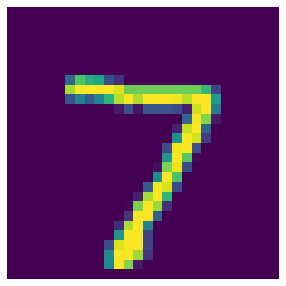

In [17]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()
    
plot_image(x_valid, 0)

In [18]:
# 두 분류 문제에 대한 예측 확률
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[6.3224074e-12 9.9567465e-10 2.4551043e-09 5.2313163e-07 1.0028251e-10
 1.4618758e-11 6.9415099e-21 9.9999952e-01 9.8700950e-09 2.9646099e-08]
[0.999563]


In [19]:
# numpy argmax 함수를 이용해 예측 확률을 실제 정답 레이블로 변환.
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [23]:
# 임계값(threshold)으로 0.5 지정. 홀수일 확률이 0.5보다 크면 홀수로 분류하는 것.
odd_labels=(odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

/var/folders/cd/8ssx8sdd7bl0kcmr2r0v3vjm0000gn/T/ipykernel_39422/1814264439.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [24]:
# flatten_layer의 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 추출된 출력을 출력으로 삼는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


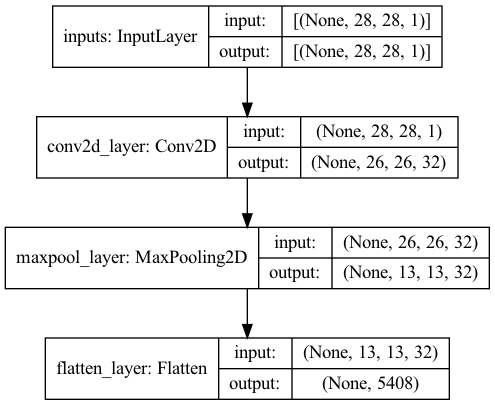

In [28]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [29]:
#Sequential API를 사용해 base_model을 레이어로 추가, 최종 분류기 역할의 Dense 레이어를 새롭게 추가
digit_model = tf.keras.Sequential([base_model,
                                  tf.keras.layers.Dense(10, activation='softmax'),
                                  ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
base (Functional)            (None, 5408)              320       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


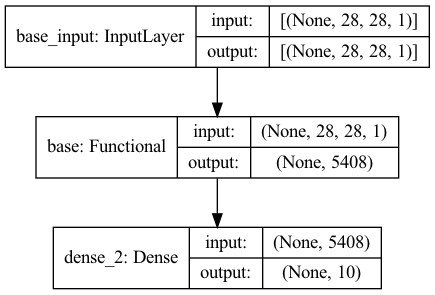

In [30]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [31]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model.fit(x_train, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2509 - accuracy: 0.9308 - val_loss: 0.0614 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0578 - accuracy: 0.9834 - val_loss: 0.0618 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0604 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0537 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0564 - val_accuracy:

In [32]:
# 베이스 모델의 가중치를 고정
base_model_frozen = tf.keras.models.Model(inputs=model.input,outputs=base_model_output, name='base_frozen')

base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [33]:
# base_model_frozen + Dense layer 구성 (Functional API 적용하여 구성)
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)

digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [34]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2362 - accuracy: 0.9380 - val_loss: 0.0542 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0484 - accuracy: 0.9864 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9902 - val_loss: 0.0526 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0503 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 0.0504 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.0552 - val_accuracy:

In [35]:
#특정 레이어를 지정하여 파라미터가 업데이트 되지 않도록 고정하는 경우도 있음
#conv2d 레이어를 취소하고 trainable 속성을 False로 지정
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen2')

base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [36]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [38]:
#모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9404 - val_loss: 0.0567 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0495 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0252 - accuracy: 0.9933 - val_loss: 0.0478 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0559 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9957 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0550 - val_accuracy: